In [2]:
import pandas as pd
import numpy
DataFrame = pd.read_csv('heart.csv', sep = ';')# target always have to in last column
DataFrame.head()

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,1,63,3,145,233,1,0,150,0,0,0,1,1
1,1,37,2,130,250,0,1,187,0,0,0,2,1
2,0,41,1,130,204,0,0,172,0,2,0,2,1
3,1,56,1,120,236,0,1,178,0,2,0,2,1
4,0,57,0,120,354,0,1,163,1,2,0,2,1


In [3]:
DataFrame.tail()

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
298,0,57,0,140,241,0,1,123,1,1,0,3,0
299,1,45,3,110,264,0,1,132,0,1,0,3,0
300,1,68,0,144,193,1,1,141,0,1,2,3,0
301,1,57,0,130,131,0,1,115,1,1,1,3,0
302,0,57,1,130,236,0,0,174,0,1,1,2,0


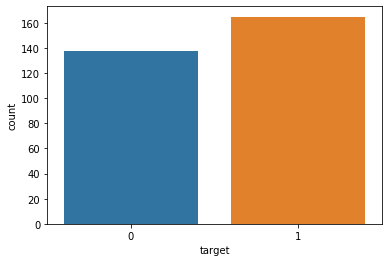

In [4]:
import seaborn as sns
sns.countplot(x = 'target', data = DataFrame) # targets name have to calls "target"

In [5]:
DataFrame.describe()

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,2.313531,0.544554
std,0.466011,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [6]:
from sklearn import preprocessing
# DataFrame_standardized = preprocessing.scale(DataFrame.iloc[:,:-1].values)   #if you need standardize
DataFrame.isnull().values.any()

False

In [7]:
DataFrame['predict'] = 0
DataFrame_CV = DataFrame.values
DataFrame_CV

array([[ 1, 63,  3, ...,  1,  1,  0],
       [ 1, 37,  2, ...,  2,  1,  0],
       [ 0, 41,  1, ...,  2,  1,  0],
       ...,
       [ 1, 68,  0, ...,  3,  0,  0],
       [ 1, 57,  0, ...,  3,  0,  0],
       [ 0, 57,  1, ...,  2,  0,  0]], dtype=int64)

In [48]:
def Neighbour(score): 
    count=[0 for i in range(2)]#for only bool classification                                       #########################
    for i,j,k in score:   
        count[k]+=1
    if count[0]>count[1]: #for only that  if number of categories of dataset is odd                  ########################
        return 0
    else:
        return 1
    
def euclidian_algorithm(array1,array2):
    distance=0
    i=0
    while(i<len(array1)):
        distance+=(array1[i]-array2[i])**2
        i+=1
    return [distance**0.5]

    
def KNN(index, trainset, testset,ReelClass,k=1):                  
    score=[]   
    for i in trainset:
        score.append(euclidian_algorithm(test,i))
    i=0
    while(i<len(index)):
        score[i].append(index[i])
        score[i].append(ReelClass[i])
        i+=1
    
    score=sorted(score,key=lambda x: x[0])[:k]
    return Neighbour(score)



from sklearn import metrics as m
# croos validation method
for k in [2*i+1 for i in range(20)]:# k= 1 3 5 7 9 11 13 15 17
    resultofmatrix=[[0,0],[0,0]]#only for boo lclassification #########################################
    i = 0
    while(i < len(DataFrame_CV)):
        j = 0
        train = []#
        test = []#
        index= []
        while(j < len(DataFrame_CV)):
            if i == j:
                test = DataFrame_CV[i]
            else:
                train.append(DataFrame_CV[j])
                index.append(j)
            j+=1
        DataFrame_CV[i,-1]=KNN(index,train,test,DataFrame_CV[:,-2],k)# only bool value   ######################################
        resultofmatrix+=m.confusion_matrix(DataFrame_CV[:,-2],DataFrame_CV[:,-1])
        i+=1
    resultofmatrix[0][0]/=len(DataFrame_CV)
    resultofmatrix[0][1]/=len(DataFrame_CV)
    resultofmatrix[1][0]/=len(DataFrame_CV)
    resultofmatrix[1][1]/=len(DataFrame_CV)
    print("\n\n---------------------------------k={}-----------------------------------------\n\n".format(k))
    print("Error Rate: ",1-(resultofmatrix[0][0]+resultofmatrix[1][1])/((resultofmatrix[0][0]+resultofmatrix[1][1])+(resultofmatrix[1][0]+resultofmatrix[0][1])))
    print("Accurate: ",(resultofmatrix[0][0]+resultofmatrix[1][1])/((resultofmatrix[0][0]+resultofmatrix[1][1])+(resultofmatrix[1][0]+resultofmatrix[0][1])))
    print("Sensitivity: ",(resultofmatrix[0][0]/(resultofmatrix[0][0]+resultofmatrix[0][1])))
    print("Specivity: ",(resultofmatrix[1][0]/(resultofmatrix[1][0]+resultofmatrix[1][1])))    

---------------------------------k=1-----------------------------------------


Error Rate:  0.4191419141914191
Accurate:  0.5808580858085809
Sensitivity:  0.4927536231884058
Specivity:  0.34545454545454546
---------------------------------k=3-----------------------------------------


Error Rate:  0.40199335548172754
Accurate:  0.5980066445182725
Sensitivity:  0.5036496350364964
Specivity:  0.3231707317073171
---------------------------------k=5-----------------------------------------


Error Rate:  0.3521594684385382
Accurate:  0.6478405315614618
Sensitivity:  0.5693430656934306
Specivity:  0.2865853658536585
---------------------------------k=7-----------------------------------------


Error Rate:  0.34219269102990035
Accurate:  0.6578073089700996
Sensitivity:  0.5620437956204379
Specivity:  0.2621951219512195
---------------------------------k=9-----------------------------------------


Error Rate:  0.3388704318936877
Accurate:  0.6611295681063123
Sensitivity:  0.576642335766423